# Computer Vision

컴퓨터 비전 API를 사용해서 이미지 속에 있는 사물을 인식하는 데모

# 1. Contents Tag

In [117]:
#1. 네트워크 통신을 위한 패키지
import requests

In [118]:
#2. 이미지 처리를 위한 패키지
import matplotlib.pyplot as plt
from PIL import Image
import os
from io import BytesIO

In [119]:
import json

In [120]:
#3. API 설정
sub_key = "821dc4a0d5c34b3e9f51b0fafff3b151"
assert sub_key

In [121]:
#4. URL 설정
vision_base_url = "https://dongman-vision.cognitiveservices.azure.com/vision/v2.0/"
analyze_url = vision_base_url + "analyze"

In [138]:
#5. 분석에 사용될 이미지 확인
#image = Image.open('nothuman1.jpg')
image_url = "https://media.istockphoto.com/photos/happy-couple-is-hiking-in-mountain-picture-id1179593309?b=1&k=6&m=1179593309&s=170667a&w=0&h=TFFFsv7DpQWwPiW-ONh5hF-YLqWKurGjJx3MidCpCxo="

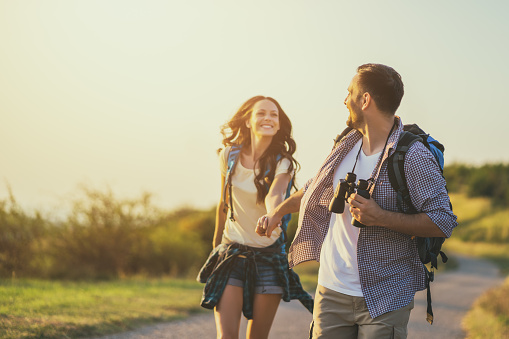

In [143]:
image = Image.open(BytesIO(requests.get(image_url).content))
image #저작권 문제가 없는 사진을 이용하였음

In [139]:
#headers = {'Ocp-Apim-Subscription-Key' : sub_key}
#params = {'visualFeatures' : 'Categories,Description,Color'}
#data = {'url' : image}

#6. 데이터 전처리
headers = {'Ocp-Apim-Subscription-Key': sub_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}

In [140]:
#7. API 통해 이미지 분석
response = requests.post(analyze_url, headers = headers, params = params, json = data)
response.raise_for_status()

In [141]:
#8. 결과 확인
analysis = response.json()

In [142]:
analysis

{'categories': [{'name': 'people_', 'score': 0.796875}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '9B8A30',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'outdoor',
   'grass',
   'woman',
   'holding',
   'field',
   'girl',
   'standing',
   'young',
   'people',
   'man',
   'wearing',
   'walking',
   'game',
   'group',
   'playing',
   'grassy',
   'street'],
  'captions': [{'text': 'a woman standing in a field',
    'confidence': 0.9179115662944269}]},
 'requestId': '587a76e0-663d-406c-9ba0-19d49bec617c',
 'metadata': {'height': 339, 'width': 509, 'format': 'Jpeg'}}

In [146]:
#9. 캡션만 따로 확인

image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'A woman standing in a field'

# 2. Object Detection

In [162]:
#1. detection을 할 URL로 설정

objectDetection_url = vision_base_url + "detect"

In [175]:
#2. 이미지 주소 받아오기

image_url = "https://media.istockphoto.com/photos/cute-puppy-and-kitten-closeup-looking-at-camera-picture-id1191962502?b=1&k=6&m=1191962502&s=170667a&w=0&h=fjYWic6QMo5uNFxLA21_--QIGcWiQlFkGC2Elh3GJ7A="

In [176]:
object_image = requests.get(image_url)

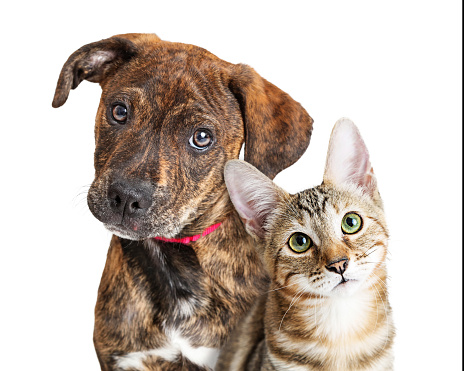

In [177]:
#3. 이미지 확인

img = Image.open(BytesIO(object_image.content))
img #저작권에 문제 없는 이미지를 활용하였음

In [178]:
#4. 데이터 전처리

headers = {'Ocp-Apim-Subscription-Key': sub_key }
#params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}

In [179]:
#7. API 통해 이미지 분석
response = requests.post(objectDetection_url, headers = headers, params = params, json = data)
response.raise_for_status()

In [180]:
detectionResult = response.json()

In [181]:
detectionResult

{'objects': [{'rectangle': {'x': 46, 'y': 26, 'w': 265, 'h': 345},
   'object': 'terrier',
   'confidence': 0.757,
   'parent': {'object': 'dog',
    'confidence': 0.912,
    'parent': {'object': 'mammal',
     'confidence': 0.939,
     'parent': {'object': 'animal', 'confidence': 0.94}}}},
  {'rectangle': {'x': 208, 'y': 114, 'w': 194, 'h': 252},
   'object': 'cat',
   'confidence': 0.864,
   'parent': {'object': 'mammal',
    'confidence': 0.871,
    'parent': {'object': 'animal', 'confidence': 0.872}}}],
 'requestId': '814a4319-b2b4-46c4-b32f-4b1daba8cb6a',
 'metadata': {'height': 371, 'width': 464, 'format': 'Jpeg'}}

In [182]:
from PIL import Image, ImageDraw, ImageFont

In [183]:
draw = ImageDraw.Draw(img)

In [184]:
def CreateImage(detectionResult) :
    
    objects = detectionResult['objects']
    
    for obj in objects:
        print(obj)
        
        rect = obj['rectangle']
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']
        
        draw.rectangle(((x,y), (x + w, y + h)), outline = 'red')
        
        fontX = x - 18
        fontY = y
        
        objectName = obj['object']
        draw.text((fontX, fontY), objectName, fill = 'red')

In [185]:
CreateImage(detectionResult)

{'rectangle': {'x': 46, 'y': 26, 'w': 265, 'h': 345}, 'object': 'terrier', 'confidence': 0.757, 'parent': {'object': 'dog', 'confidence': 0.912, 'parent': {'object': 'mammal', 'confidence': 0.939, 'parent': {'object': 'animal', 'confidence': 0.94}}}}
{'rectangle': {'x': 208, 'y': 114, 'w': 194, 'h': 252}, 'object': 'cat', 'confidence': 0.864, 'parent': {'object': 'mammal', 'confidence': 0.871, 'parent': {'object': 'animal', 'confidence': 0.872}}}


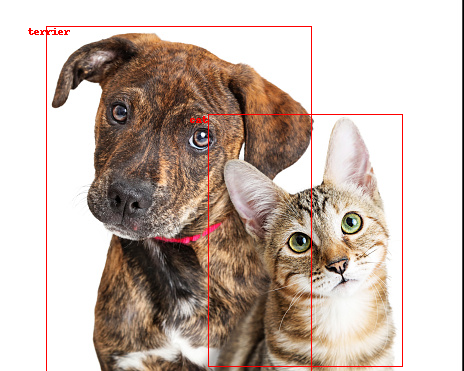

In [186]:
img